In [2]:
import numpy as np
import scipy as sp
import math
from tedopa import _recurrence_coefficients as rc
import matplotlib.pyplot as plt

In [3]:
# Parameters
gamma = 1
Omega = 150.
coupling  = 1.
temp = 150
hcut = 250

In [29]:
#Define anti-symmetrized Lorentz
# def asl(s,omega,gamma,x):
#     return (s* gamma*(np.power(gamma,2)+np.power(omega,2))/np.pi * (1./ (
#     np.power(gamma, 2) + np.power(x - omega, 2)) - 1./ (
#     np.power(gamma, 2) + np.power(x + omega, 2))))

#ATTENTION: drop 1/pi factor, which is already set in recurrenceCoefficients

def asl(s,omega,gamma,x):
    return s * (1./ (
    np.power(gamma, 2) + np.power(x - omega, 2)) - 1./ (
    np.power(gamma, 2) + np.power(x + omega, 2)))

# def asl2(x):
#     return (modeCoupling2 * (1. / np.pi * gamma / (
#     np.power(gamma, 2) + np.power(x - mode2, 2)) - 1. / np.pi * gamma / (
#     np.power(gamma, 2) + np.power(x + mode2, 2))))
#
aslv=np.vectorize(asl)
#asl2v=np.vectorize(asl2)
#supOhm5v=np.vectorize(supOhm5)

if (temp==0):
    omegaCN=0.
    jj = lambda x: aslv(coupling,Omega,gamma,x)
else:
    #jj = lambda x: 0.5 * (1. + 1. / np.tanh(0.5 * x * 1.4387773 / temp)) * aslv(coupling, Omega, gamma, x)
    jj = lambda x: 0.5 * (1. + 1. / np.tanh(0.5 * x / temp)) * aslv(coupling, Omega, gamma, x)

In [ ]:
#Show SD...
poi = np.linspace(-hcut,hcut,1000)
plt.plot(poi,jj(poi))

In [30]:
alphas,betas = rc.recurrenceCoefficients(700,-hcut,hcut,jj,1,ncap=10000)

In [31]:
omegas = np.array(alphas)
coups = np.sqrt(betas)
ts = np.sqrt(np.array(betas[1::]))
c0 = np.sqrt(betas[0])

In [32]:
c0

1.4699098960104768

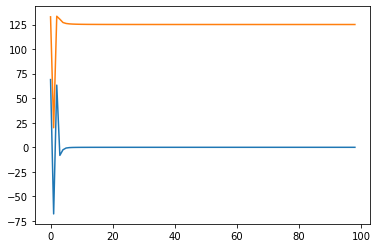

In [33]:
plt.plot(omegas[0:99], label="freqs")
plt.plot(coups[1:100],label = "coups")
plt.show()


In [34]:
np.savetxt("lorentz_"+str(Omega)+"_"+str(gamma)+"_"+str(coupling)+"_T_"+str(temp)+"_freqs.dat",omegas)
np.savetxt("lorentz_"+str(Omega)+"_"+str(gamma)+"_"+str(coupling)+"_T_"+str(temp)+"_coups.dat",coups)